In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
df1 = pd.read_csv('measurements.csv')

In [3]:
df1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df2=pd.read_excel('measurements2.xlsx')

In [5]:
df2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
df1.shape

(388, 12)

In [7]:
df2.shape

(388, 12)

In [8]:
df1.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [9]:
df2.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


In [10]:
df1.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [11]:
df2.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

Looks like excel and csv files are the same. I will continue with the excel file as decimals are sperated with dot and not comma like in the csv file.

In [12]:
df = df2.copy()

In [13]:
df.rename(columns={'refill liters': 'refill_liters', 'refill gas': 'refill_gas'}, inplace=True)

In [14]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

#### specials,refíll_liters,refill_gas columns have too many nan values and we will have to deal with them.

#### specials

In [15]:
df['specials'].value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

Looks like the column special is referring to the weather conditions. We have 295 nans in that column. We can create a new category called 'other' and we can add the nan values there.

In [16]:
df['specials'].fillna('other', inplace=True)

In [17]:
df['specials'].replace(to_replace='ac', value='AC', inplace=True)
df['specials'].replace(to_replace='AC Sun', value='AC sun', inplace=True)
df['specials'].replace(to_replace='sun ac', value='AC sun', inplace=True)
df['specials'].replace(to_replace='ac rain', value='AC rain', inplace=True)
df['specials'].replace(to_replace='half rain half sun', value='rain_sun', inplace=True)

In [18]:
df['specials'].unique()

array(['other', 'AC rain', 'AC', 'rain', 'snow', 'AC snow', 'rain_sun',
       'sun', 'AC sun'], dtype=object)

#### temp_inside

In [19]:
df['temp_inside'].value_counts()

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

We have only 12 nan values in the 'temp_inside' therefore we can use KNN imputer to fill the nan values.

In [20]:
imputer = KNNImputer(n_neighbors=5)
df['temp_inside'] = imputer.fit_transform(df[['temp_inside']])

In [21]:
df['temp_inside'].value_counts()

21.500000    133
22.000000    102
22.500000     59
20.000000     25
21.000000     13
23.000000     13
21.929521     12
25.000000     12
24.500000      7
20.500000      4
24.000000      3
23.500000      2
25.500000      2
19.000000      1
Name: temp_inside, dtype: int64

In [22]:
df['temp_inside'] = round(df['temp_inside'],2)

In [23]:
df['temp_inside'].value_counts()

21.50    133
22.00    102
22.50     59
20.00     25
21.00     13
23.00     13
21.93     12
25.00     12
24.50      7
20.50      4
24.00      3
23.50      2
25.50      2
19.00      1
Name: temp_inside, dtype: int64

In [24]:
df['temp_inside'].isna().sum()

0

#### refill_liters

In [25]:
df['refill_liters'].value_counts()

45.0    2
37.7    2
39.0    2
37.6    1
38.0    1
38.3    1
10.0    1
41.0    1
37.0    1
37.2    1
Name: refill_liters, dtype: int64

Above we can see how many liters of gas was used to refill the tank. We have nan values probably because the tank was not refilled. We can replace the nan values with 0.

In [26]:
df['refill_liters'].fillna(0,inplace=True)

In [27]:
df['refill_liters'].value_counts()

0.0     375
45.0      2
37.7      2
39.0      2
37.6      1
38.0      1
38.3      1
10.0      1
41.0      1
37.0      1
37.2      1
Name: refill_liters, dtype: int64

In [28]:
df['refill_liters'].isna().sum()

0

#### refill_gas

In [29]:
df['refill_gas'].value_counts()

SP98    8
E10     5
Name: refill_gas, dtype: int64

In [30]:
df['refill_gas'].isna().sum()

375

We have here the same amount of nan values as 'refill_liters' and the reason is the tank has never been refilled. Here we can replace the nan values with 'no' to show that there is no refill.

In [31]:
df['refill_gas'].fillna('no',inplace=True)

In [32]:
df['refill_gas'].value_counts()

no      375
SP98      8
E10       5
Name: refill_gas, dtype: int64

In [33]:
df['refill_gas'].isna().sum()

0

In [34]:
df.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill_liters    0
refill_gas       0
dtype: int64

In [35]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,other,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,other,E10,0,0,0,0.0,no
2,11.2,5.5,38,21.5,15,other,E10,0,0,0,0.0,no
3,12.9,3.9,36,21.5,14,other,E10,0,0,0,0.0,no
4,18.5,4.5,46,21.5,15,other,E10,0,0,0,0.0,no


In [36]:
df.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
383,16.0,3.7,39,24.5,18,other,SP98,0,0,0,0.0,no
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,0.0,no
385,16.0,3.8,45,25.0,19,other,SP98,0,0,0,0.0,no
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,0.0,no
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,0.0,no


## Data Exploration

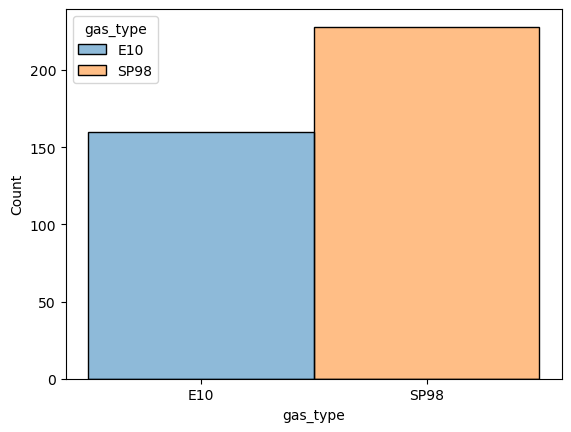

In [37]:
sns.histplot(df, x = 'gas_type', hue='gas_type')
plt.show()

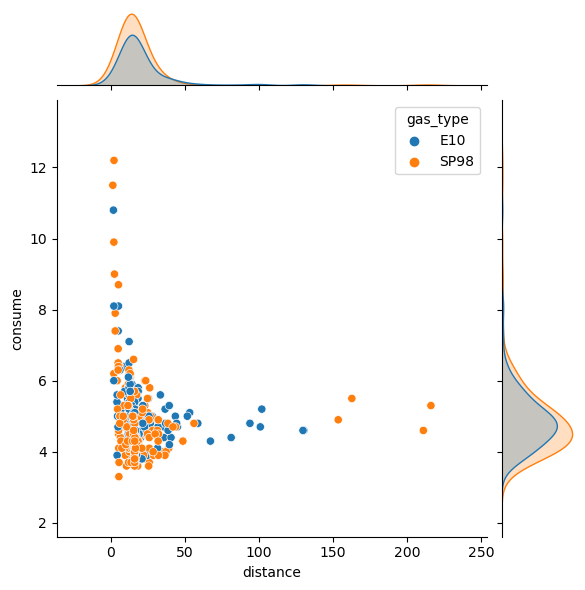

In [38]:
sns.jointplot(data=df, x="distance", y="consume", hue="gas_type")

From the above graph we can see that SP98 is performing better in long distances. In short distances the car is consuming more gas which make sense because city driving is more demanding than highway driving. City has a lot of stop and go and varrying speeds while highway driving is usually driving at a consistent speed non-stop.

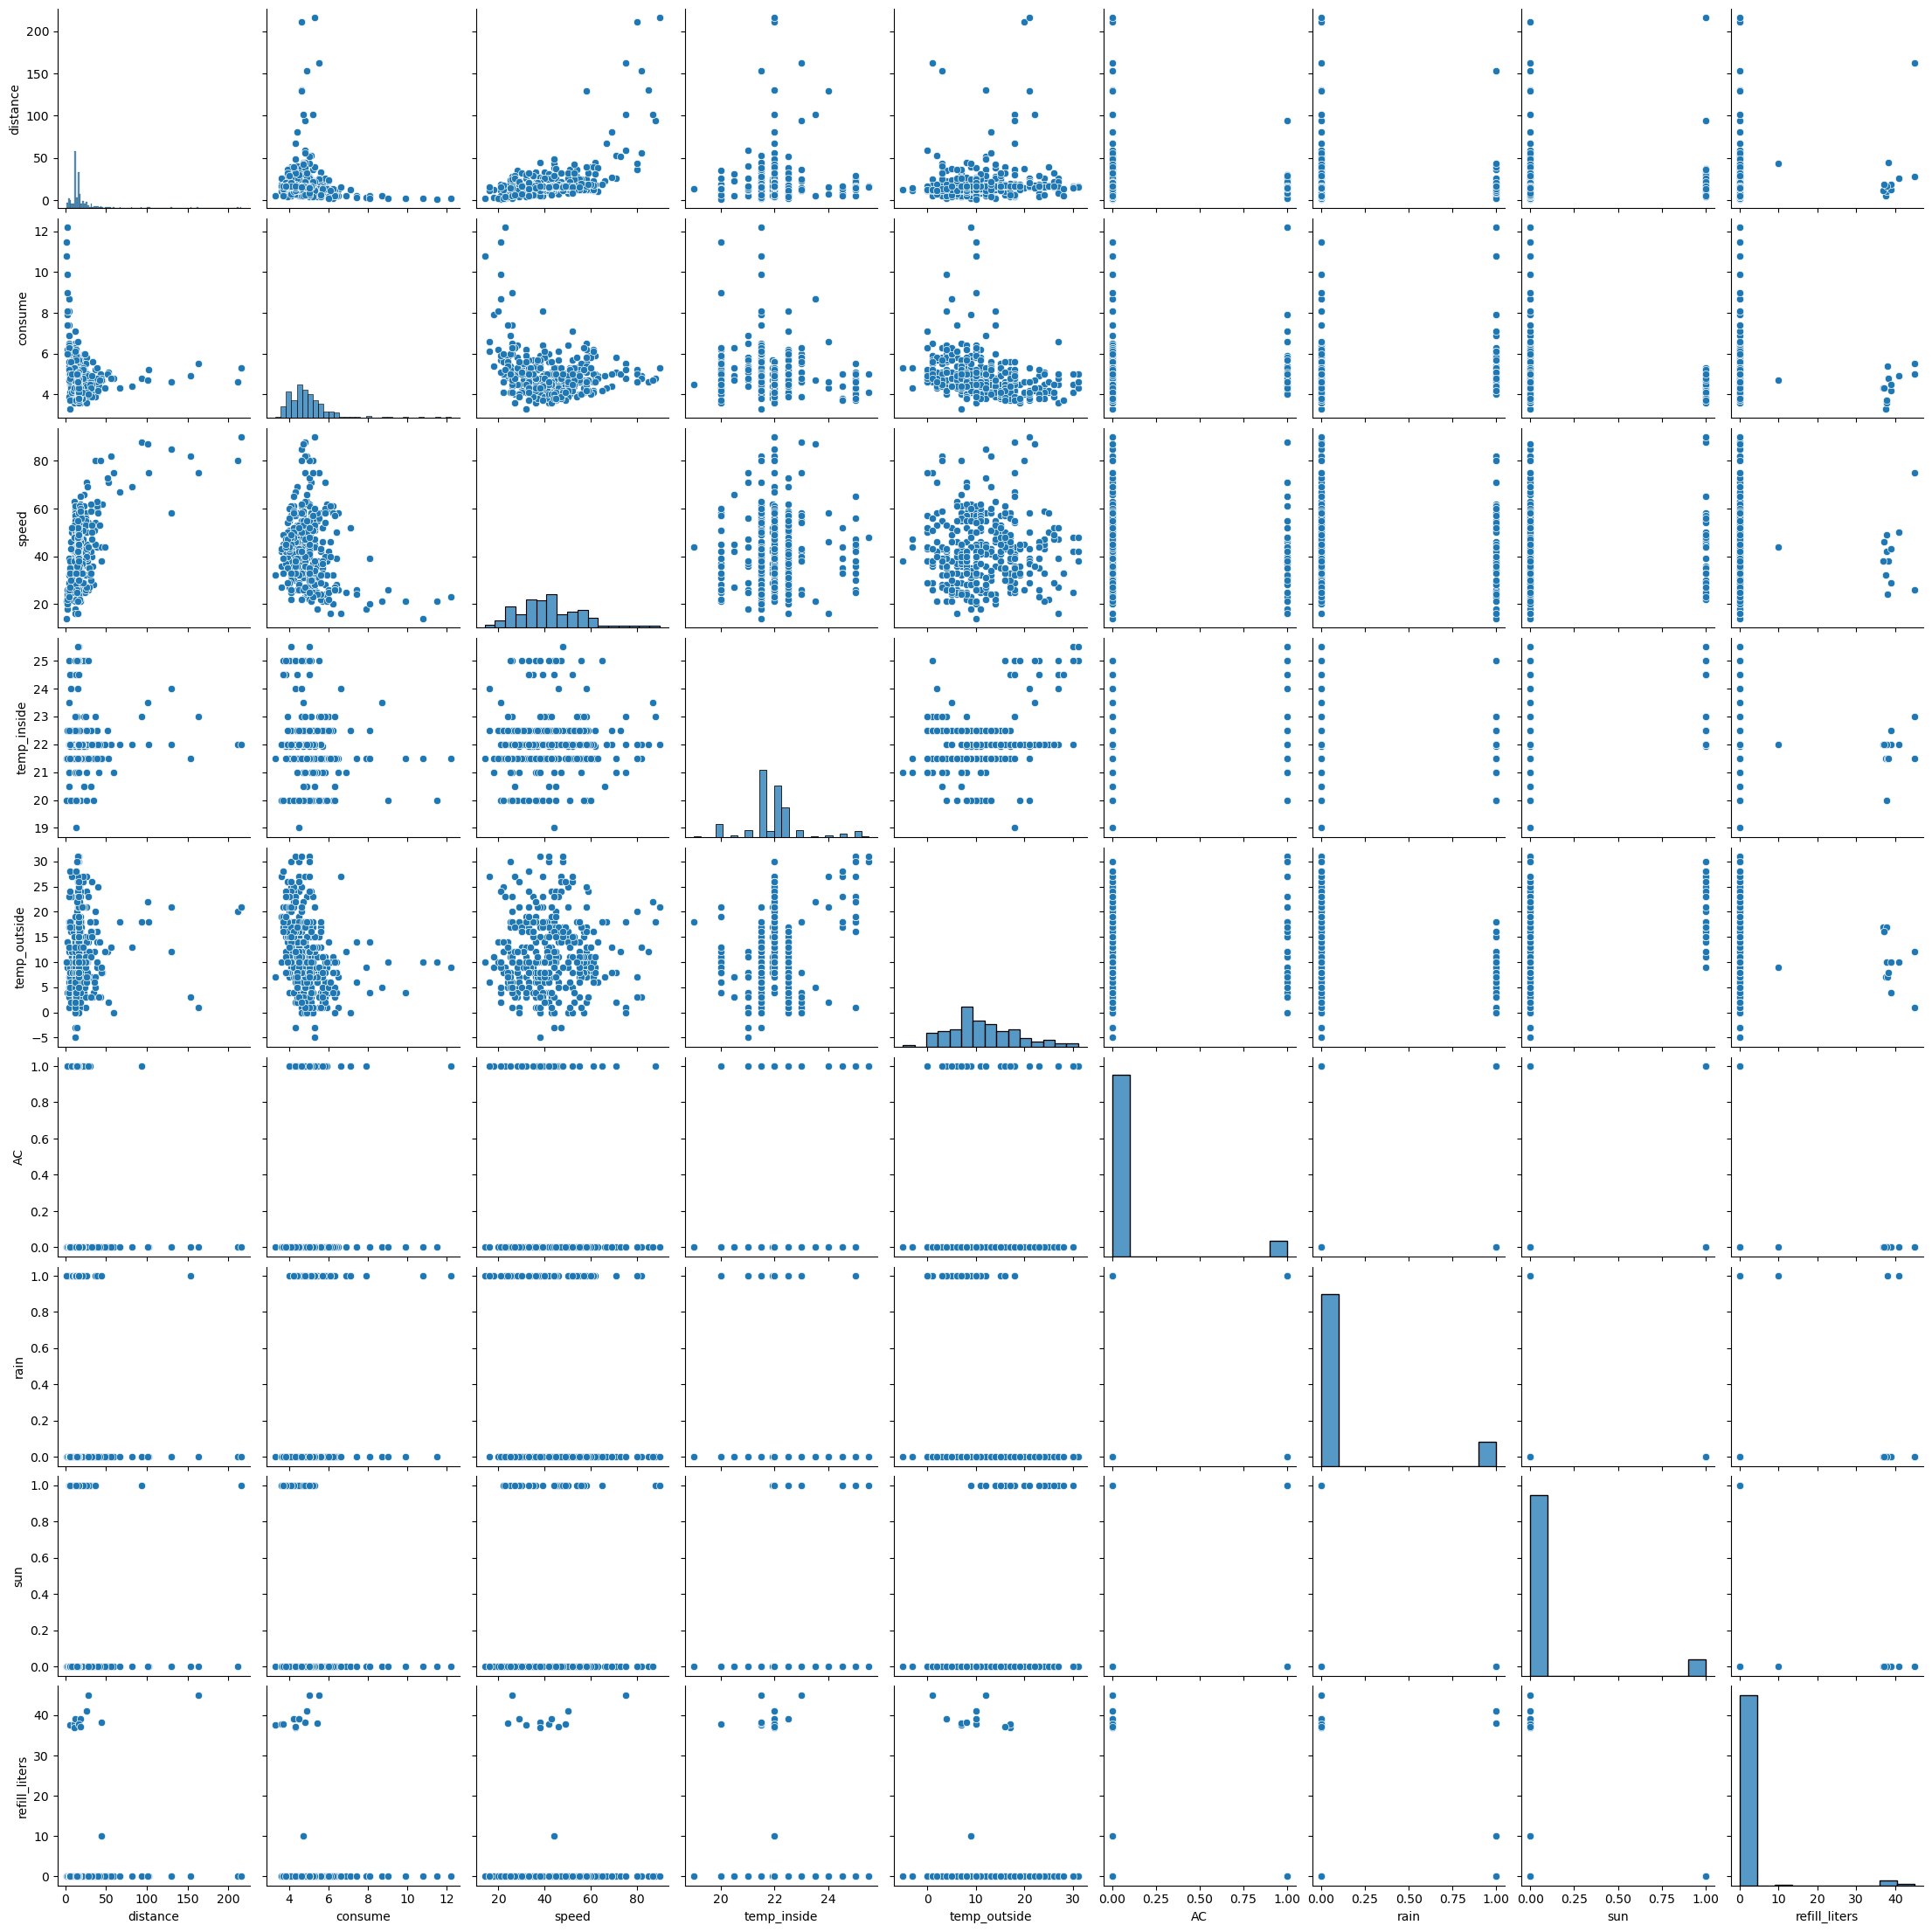

In [39]:
sns.pairplot(df)

C:\Users\oktay\AppData\Local\Temp\ipykernel_11372\3176848687.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='crest')


<Axes: >

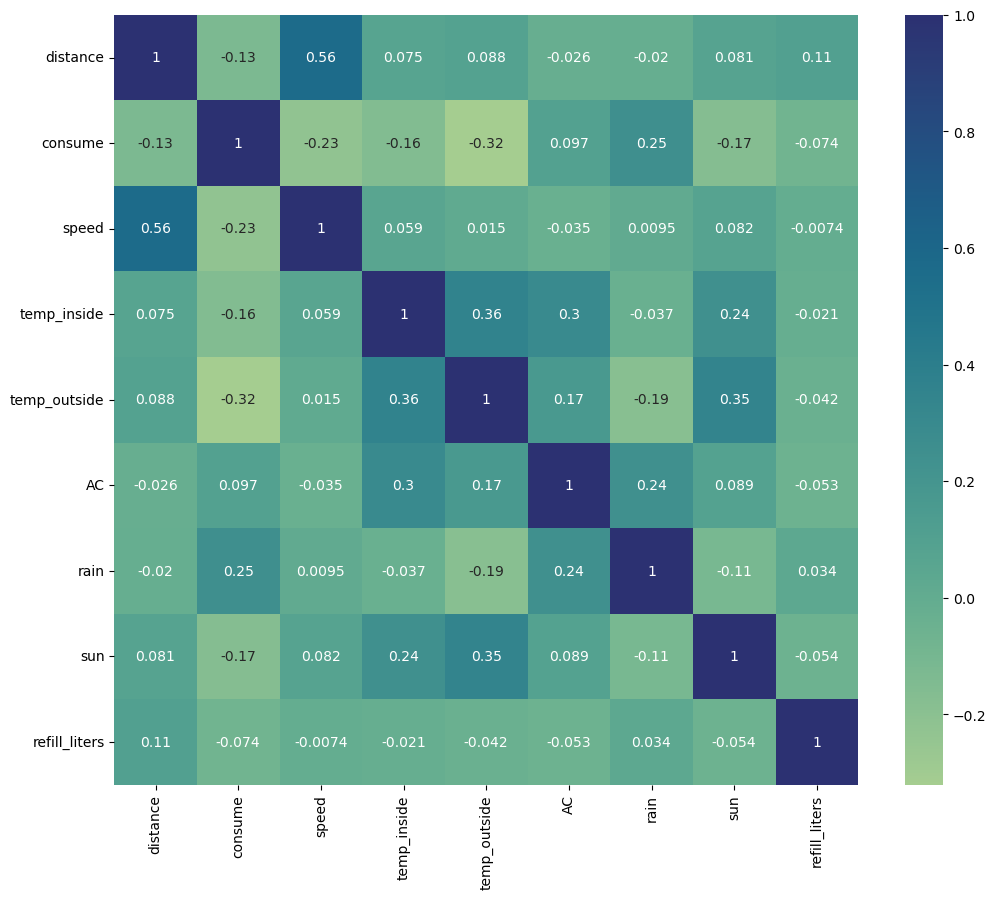

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='crest')

We don't have higly correlated columns.

### Hypotesis

In [41]:
ac_on=df[df['AC']==1]['consume']
ac_off=df[df['AC']==0]['consume']

t_stat,p_value=stats.ttest_ind(ac_on,ac_off)
print(f't-statistic: {round(t_stat,2)}, p-value: {round(p_value,3)}')

t-statistic: 1.91, p-value: 0.057


P-value is more than 0.05 therefore we can not conclude that there is an influence of the AC on the fuel consumption.

In [45]:
e10 = df[df['gas_type'] == 'E10']['consume']
sp98 = df[df['gas_type'] == 'SP98']['consume']

t_stat, p_value = stats.ttest_ind(e10, sp98)
print(f"t-statistic: {round(t_stat,2)}, p-value: {round(p_value,2)}")

t-statistic: 0.3, p-value: 0.76


P-value is more than 0.05, we can not say that there is a significant difference in fuel consumption between vehicles using E10 and SP98.